### 使用决策树算法API对鸢尾花数据进行分类操作，并理解及进行决策树API的相关参数优化

- [MinMaxScaler官方文档](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- [不同缩放器，变换器和规范器的比较](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)
- [SelectKBest 官方文档](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)
- [PCA 官方文档](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
- [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV)

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest # 特征选择
from sklearn.feature_selection import chi2 # 卡方统计量
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV # 网格搜索交叉验证

In [61]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [62]:
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [63]:
path = './datas/iris.data'  
data = pd.read_csv(path, header=None)
print(data[:5]) # 打印前五条数据

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [64]:
x = data[np.arange(0,4)]
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
# 在实际建模过程中，我们经常需要对离散型变量进行预处理，譬如性别，类目，标签等等
print(data[4][:4])
y = pd.Categorical(data[4]).codes 
print(y)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
Name: 4, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [66]:
print ("总样本数目：%d；特征属性数目：%d" % x.shape)

总样本数目：150；特征属性数目：4


In [67]:
# path = './datas/iris.data'  
# data = pd.read_csv(path, header=None)
# x = data[range(4)]
# y = pd.Categorical(data[4]).codes 
# print ("总样本数目：%d；特征属性数目：%d" % x.shape)

In [68]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：120, 测试数据集样本数目：30


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [69]:
#数据标准化
#StandardScaler (基于特征矩阵的列，将属性值转换至服从正态分布)
#标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下
#常用与基于正态分布的算法，比如回归
#数据归一化
#MinMaxScaler （区间缩放，基于最大最小值，讲数据转换到0,1区间上的）
#提升模型收敛速度，提升模型精度
#常见用于神经网络
#Normalizer （基于矩阵的行，将样本向量转换为单位向量）
#其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准
#常见用于文本分类和聚类、logistic回归中也会使用，有效防止过拟合
ss = MinMaxScaler()

x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)

print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

原始数据各个特征属性的调整最小值: [-1.19444444 -0.83333333 -0.18965517 -0.04166667]
原始数据各个特征属性的缩放数据值: [ 0.27777778  0.41666667  0.17241379  0.41666667]


In [70]:
#特征选择：从已有的特征中选择出影响目标值最大的特征属性
#常用方法：{ 分类：F统计量、卡方系数，互信息mutual_info_classif
        #{ 连续：皮尔逊相关系数 F统计量 互信息mutual_info_classif
#SelectKBest（卡方系数）

# chi2 对分类任务的非负面特征的卡方统计量
# k=3 在当前的案例中，使用SelectKBest这个方法从4个原始的特征属性，选择出来3个，
# k默认为10，如果指定了，那么就会返回你所想要的特征的个数
ch2 = SelectKBest(chi2, k=3) 

# 训练完后， x_train只包含三个特征了
x_train = ch2.fit_transform(x_train, y_train)
x_test = ch2.transform(x_test)

# get_support 获取所选要素的掩码或整数索引
select_name_index = ch2.get_support(indices=True)
print(select_name_index)
print ("对类别判断影响最大的三个特征属性分布是:", ch2.get_support(indices=False))

[0 2 3]
对类别判断影响最大的三个特征属性分布是: [ True False  True  True]


In [71]:
#降维：对于数据而言，如果特征属性比较多，在构建过程中，会比较复杂，这个时候考虑将多维（高维）映射到低维的数据
#常用的方法：
#PCA：主成分分析（无监督）
#LDA：线性判别分析（有监督）类内方差最小，人脸识别，通常先做一次pca
pca = PCA(n_components=2)
#这里是为了后面画图方便，所以将数据维度设置了2维，一般用默认不设置参数就可以

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [72]:
# 默认gini， 这里选择熵
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test) 

In [73]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file=f)

In [74]:
y_test2 = y_test.reshape(-1)
result = (y_test2 == y_test_hat)
print ("准确率:%.2f%%" % (np.mean(result) * 100))

print ("Score：", model.score(x_test, y_test))
print ("Classes:", model.classes_)

准确率:96.67%
Score： 0.966666666667
Classes: [0 1 2]


In [75]:
#画图
N = 100   #横纵各采样多少个值
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))
x1_max = np.max((x_train.T[0].max(), x_test.T[0].max()))
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))
x2_max = np.max((x_train.T[1].max(), x_test.T[1].max()))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0]   #测试点

y_show_hat = model.predict(x_show) #预测值

y_show_hat = y_show_hat.reshape(x1.shape)  #使之与输入的形状相同
print (y_show_hat.shape)
y_show_hat[0]

(100, 100)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

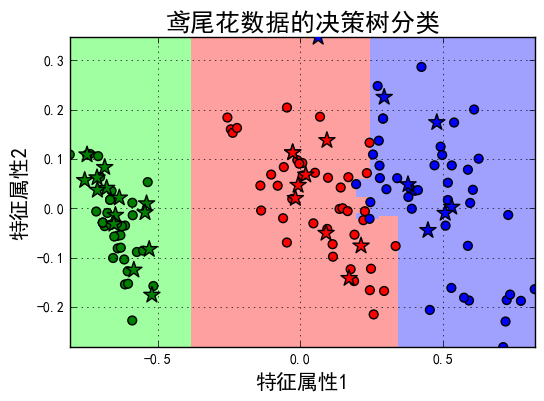

In [76]:
plt_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=plt_light) 
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'特征属性1', fontsize=15)
plt.ylabel(u'特征属性2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=18)
plt.show()

In [77]:
pipe = Pipeline([
            ('mms', MinMaxScaler()),
            ('skb', SelectKBest(chi2)),
            ('pca', PCA()),
            ('decision', DecisionTreeClassifier())
        ])

# 参数
# pca的n_components参数为什么可以填小数？
parameters = {
    "skb__k": [1,2,3,4],
    "pca__n_components": [0.5,1.0],#设置为浮点数代表主成分方差所占最小比例的阈值，这里不建议设置为数值，思考一下？
    "decision__criterion": ["gini", "entropy"],
    "decision__max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1

gscv = GridSearchCV(pipe, param_grid=parameters)

gscv.fit(x_train2, y_train2)

print("最优参数列表:",gscv.best_params_)
print ("score值：",gscv.best_score_)

y_test_hat2 = gscv.predict(x_test2)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:446: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.components_ = components_[:n_components]
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:448: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.explained_variance_ = explained_variance_[:n_components]
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:450: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  explained_variance_ratio_[:n_components]
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:451: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.singular_values_ = singular_values_[:n_components]
D:\ProgramData\Anaconda

最优参数列表: {'decision__criterion': 'gini', 'pca__n_components': 0.5, 'decision__max_depth': 2, 'skb__k': 2}
score值： 0.9333333333333333


In [ ]:
mms_best = MinMaxScaler()
skb_best = SelectKBest(chi2, k=2)
pca_best = PCA(n_components=0.5)
decision3 = DecisionTreeClassifier(criterion='gini', max_depth=2)

x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1
x_train3 = pca_best.fit_transform(skb_best.fit_transform(mms_best.fit_transform(x_train3, y_train3), y_train3))
x_test3 = pca_best.transform(skb_best.transform(mms_best.transform(x_test3)))
decision3.fit(x_train3, y_train3)

print("正确率:", decision3.score(x_test3, y_test3))

In [ ]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x.iloc[:, :2], y, train_size=0.7, random_state=14)

depths = np.arange(1, 15)
err_list = []
for d in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d)
    clf.fit(x_train4, y_train4)
    
    score = clf.score(x_test4, y_test4)
    err = 1 - score
    err_list.append(err)
    print("%d深度，正确率%.5f" % (d, score))

## 画图
plt.figure(facecolor='w')
plt.plot(depths, err_list, 'ro-', lw=3)
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.grid(True)
plt.title(u'决策树层次太多导致的拟合问题(欠拟合和过拟合)', fontsize=18)
plt.show()